# **Introducción a MATPLOTLIB**

Profesor: **Héctor Maravillo**, hector.maravillo@udlap.mx

La **Matplotlib** es la librería más popular en Python para crear gráficas. Fue desarrollada por el neurobiólogo estadounidense John Hunter en 2003 para emular los comandos de MATLAB en Python.

## **Estructura**

Cada visualización en Matplotlib se compone de dos objetos:

* **Figure** Encapsula cada visualización, puede contener varios gráficos individuales (**axes**) y permite configurar elementos principales como el título.
* **Axes** Es un objeto que contiene una gráfica individual y permite configurar elementos como los ejes (x, y) y las leyendas de cada gráfica.


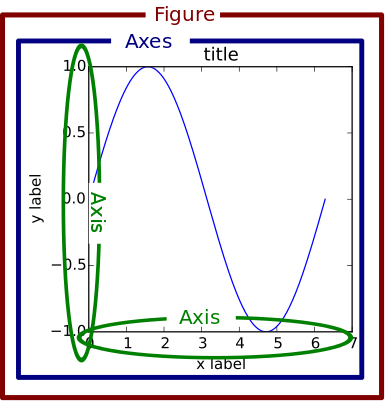

## **Crear una figura**

El módulo **pyplot** contiene una interfaz para crear visualizaciones sin configurar explícitamente  los objetos **Figure** y **Axes**. Generalmente se importa el módulo nombrándolo  como **plt**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Para crear una visualización se usa la función *plt.figure()* que crea una instancia del objeto **Figure**, pero también mantiene un registro guardado, por lo tanto cualquier comando posterior relacionado, será  aplicado a esta instancia.

In [2]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Para obtener una referencia al eje actual se usa el comando *plt.gca()*



```
ax = plt.gca()
```



Al terminar de elaborar una figura es conveniente cerrarla para liberar memoria. Esto se logra con el comando:

In [3]:
plt.close()

Cuando se trabaja con varias figuras a la vez, se puede crear o cerrar una figura particular especificando su número

In [4]:
#Create Figure with Figure number 10
plt.figure(num=10)
#Close Figure with Figure number 10
plt.close(10)

Para cerrar todas las figuras se debe especificar el argumento 'all':

In [5]:
plt.close('all')

Elementos que controla el objeto **Figure** mediante parámetros

* Tamaño de la figura: *figsize*
* Píxeles por pulgada: *dpi*
* Color de fondo: *facecolor*
* Color y tamaño del marco: *linewidht* y *edgecolor*

Por default la **Figure** tiene un ancho de 6.4 pulgadas y alto de 4.8 pulgadas, con un **dpi** (*dots per inch*) de 100.

Para visualizar una figura basta el comando *plt.show()*

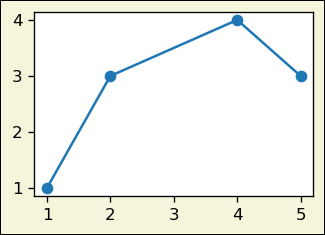

In [6]:
plt.figure(figsize=(3, 2),
           dpi=120,
           facecolor="beige",
           linewidth=1,
           edgecolor="black")
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.show()

Además, el usuario puede especificar diseños automáticos  de los **Axes**. Estos diseños cambian la escala de los ejes dentro de la figura para evitar superposición de etiquetas de marca e intentan alineación de ejes. Los motores son:

* *constrained*
* *compressed*
* *tight*

Al salvar una figura se pueden configurar algunas opciones como los dpi, el formato, la transferencia y el ancho en los márgenes.

In [7]:
plt.savefig('name.png', dpi=150, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## **Crear multiples gráficas**


### **Subplots**

Un objeto **Figure** puede contener varios objetos **Axes** cada uno de los cuales corresponde a una gráfica.

La manera más sencilla de incrustar varias gráficas es usar el comando *plt.subplots()*. Esta función devuelve dos objetos una figura y un *numpy.array* de 1 o 2 dimensiones cuyos elementos son **Axes**

Este comando puede recibir un número para figuras apiladas verticalmente:

In [8]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

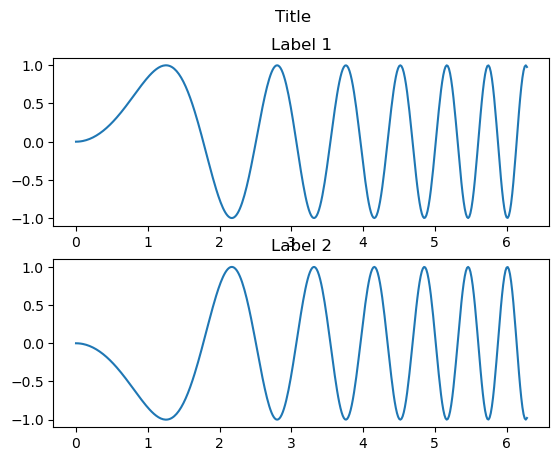

In [9]:
fig, axes = plt.subplots(2)
fig.suptitle("Title")
axes[0].plot(x,y)
axes[0].set_title("Label 1")
axes[1].plot(x, -y)
axes[1].set_title("Label 2")
plt.show()
plt.close()

Cuando se usan varios *subplots*, una función muy útil es *plt.tight_layout()* que ajusta el espacio entre las gráficas para minimizar la superposición.

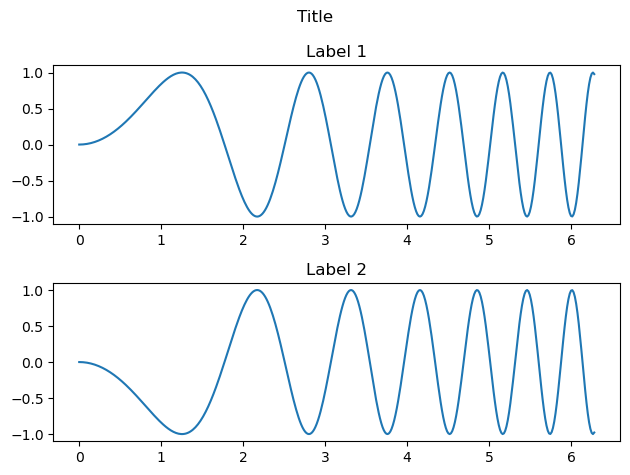

In [10]:
fig, axes = plt.subplots(2)
fig.suptitle("Title")
axes[0].plot(x,y)
axes[0].set_title("Label 1")
axes[1].plot(x, -y)
axes[1].set_title("Label 2")
plt.tight_layout()
plt.show()
plt.close()

También es posible incrustar un *grid* de gráficas en una figura, simplemente pasando el número de gráficas por filas y columnas. Se podrá acceder a los elementos del objeto **axes** a través de sus índices o iterando con el comando *axes.flat*

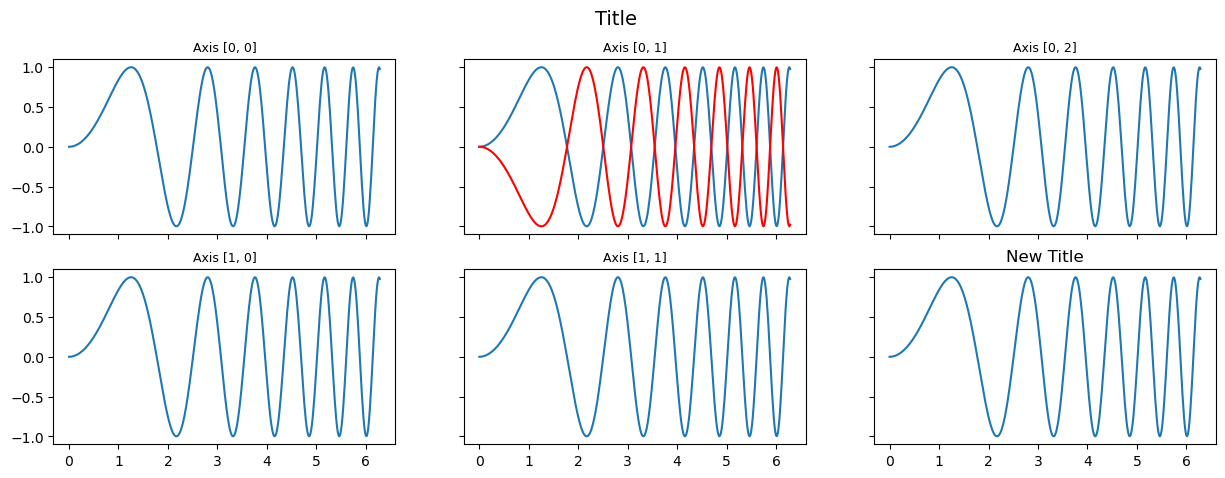

In [11]:
n_row = 2
n_col = 3
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5))
# Iterate over indexes
for i in range(n_row):
  for j in range(n_col):
    axes[i, j].set_title(f'Axis [{i}, {j}]', fontsize=9)
# Iterate over elements
for ax in axes.flat:
  ax.plot(x, y)
  # Hide x labels and tick labels for top plots and y ticks for right plots.
  ax.label_outer()
# Acces a specific graph
axes[0,1].plot(x, -y, color="red")
# Set element in figure
fig.suptitle("Title", fontsize=14)
# note: plt. set the last axes in the memory
plt.title("New Title")
plt.show()
plt.close()

De forma preestablecida cada **Axes** se escala individualmente, para alinear las etiquetas de marcas de los ejes use el parámetro *sharex* (horizonal) o *sharey* (vertical) en *plt.subplots*.

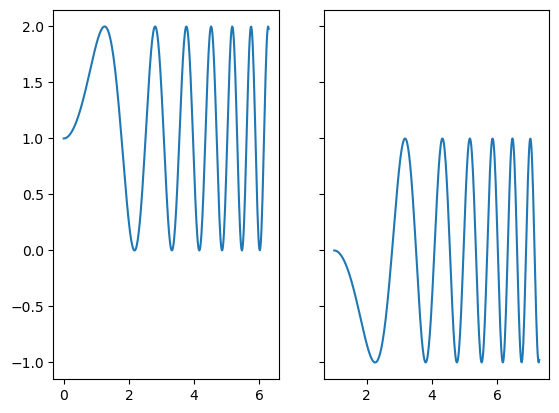

In [12]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(x, y+1)
ax[1].plot(x + 1, -y)
plt.show()
plt.close()

Estos parámetros también permiten identificar si el alineamiento es por filas o columnas.


```
plt.subplots(sharex='col', sharey='row')
```



Para controlar con precisión la posición de los subplots puede crear un grid *fig.add_gridspec()*. Dentro de los parámetros puede controlar la distancia entre *subplots* con *hspace* (vertica) y *wspace* (horizontal). Después debe llamar al método *subplots*.

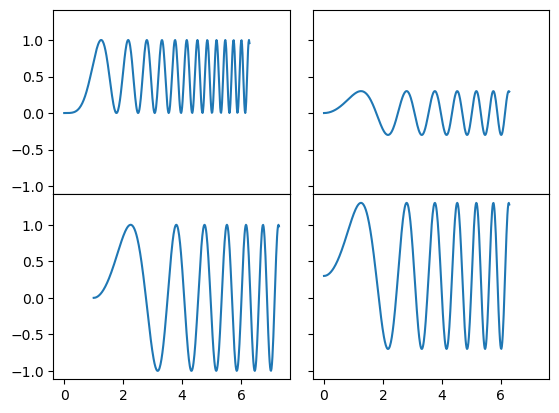

In [13]:
fig = plt.figure()
grid = fig.add_gridspec(2,2, hspace=0, wspace=0.1)
axes = grid.subplots(sharex=True, sharey=True)
axes[0,0].plot(x, y**2)
axes[0,1].plot(x, 0.3*y)
axes[1,0].plot(x+1, y)
axes[1,1].plot(x, y+.3)
for ax in axes.flat:
  ax.label_outer()
plt.show()
plt.close()

### **Mosaicos**

Una forma más general para crear *subplots* es usar la función *plt.subplot_mosaic* el cual permite crear composiciones de gráficas, mediante una matriz de etiquetas

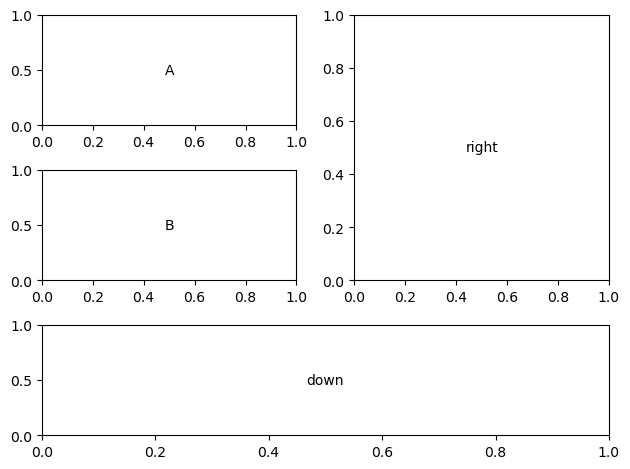

In [14]:
fig, axes = plt.subplot_mosaic([['A', 'right'],
                                ['B', 'right'],
                                ['down', 'down']])
for ax_name, ax in axes.items():
  ax.text(0.5, 0.5, ax_name, ha='center', va='center')
  plt.tight_layout()
plt.show()
plt.close()

También es posible anidar subfiguras (cada una con sus respectivos **Axes**) dentro de una **Figure**, usando la función *plt.subfigures()'

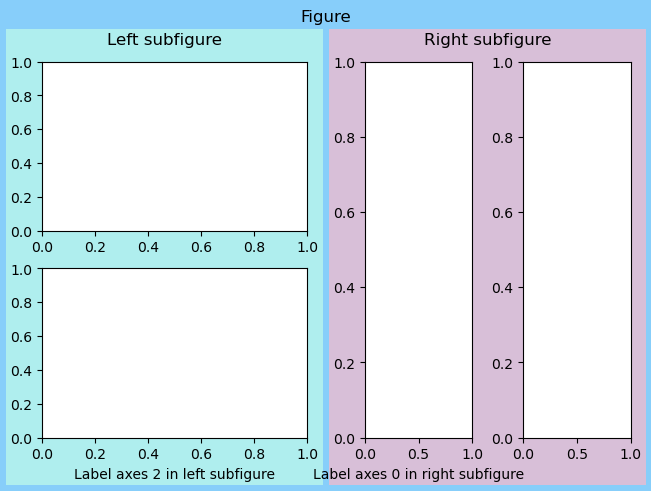

In [15]:
# Create Figure
fig = plt.figure(layout='constrained', facecolor='lightskyblue')
# Create Subfigure
subfig = fig.subfigures(1, 2)
# Create axes for each subfigure
axes_left = subfig[0].subplots(2, 1)
axes_right = subfig[1].subplots(1, 2)
# Define titles of figure, subfigure and axes labels
fig.suptitle('Figure')
subfig[0].suptitle("Left subfigure")
subfig[1].suptitle("Right subfigure")
axes_left[1].set_xlabel("Label axes 2 in left subfigure")
axes_right[0].set_xlabel("Label axes 0 in right subfigure")
# Set background color on each subfigure
subfig[0].set_facecolor('paleturquoise')
subfig[1].set_facecolor('thistle')

### **Efecto de zoom**

In [16]:
x1 = np.random.uniform(0, 10, (25, 2))
x2 = np.random.multivariate_normal((1,1), ((.05,0), (0,.05)), size=50)
x = np.concatenate((x1, x2))

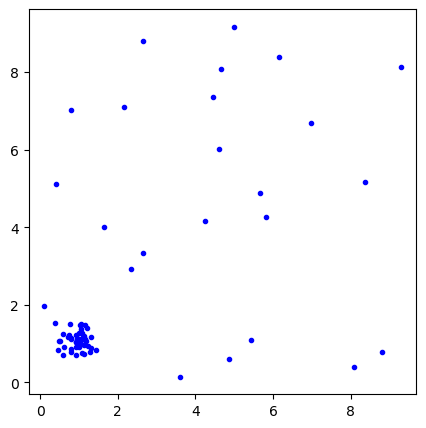

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[:, 0], x[:, 1], marker='.', color="b")
ax.axis('equal')
plt.show()

Para generar un zoom a una parte de la gráfica se necesitan los siguientes tres pasos

* Añadir un nuevo **Axes**
```
axins = ax.inset_axes(bounds = [1.2, .5, .45, .45], # Establece donde se colocará un nuevo **Axes** en proporción de la figura, los primeros dos elementos corresponden a la posición x,y y los últimos dos al ancho y largo.
                      xlim=x_zoom, ylim=y_zoom # Establece los límites donde se extrae el zoom)
```
* Generar de nuevo la gráfica usando el nuevo **Axes**
```
axins.scatter(x, y)
```
* Establecer líneas para guiar el recuadro del zoom
```
ax.indicate_inset_zoom(inset_ax # Colocar el nuevo **Axes**)
```




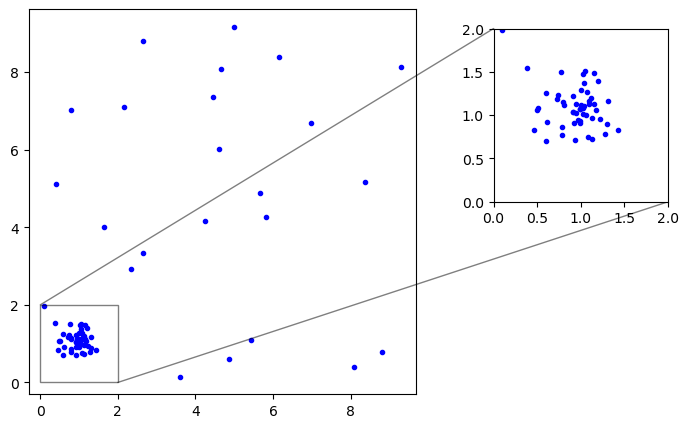

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[:, 0], x[:, 1], marker='.', color="b")
ax.axis('equal')
x_zoom = (0, 2)
y_zoom = (0, 2)
axins = ax.inset_axes(bounds = [1.2, .5, .45, .45],
                      xlim=x_zoom, ylim=y_zoom
axins.scatter(x[:, 0], x[:, 1], marker='.', color="b")
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.show()

## **Definir elementos de **Axes****

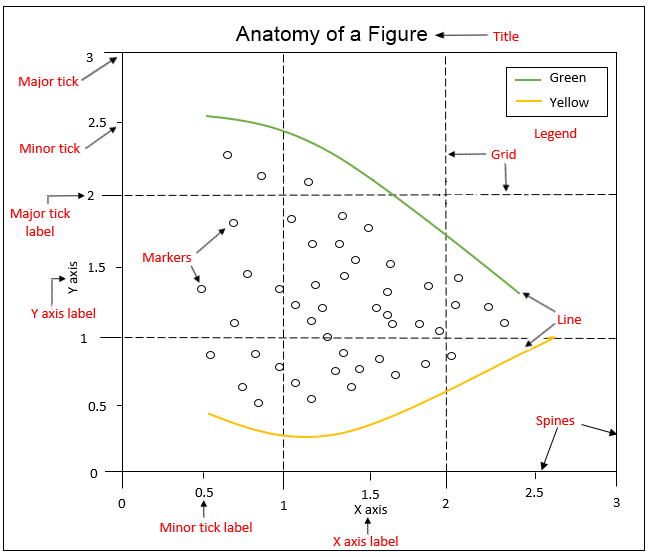

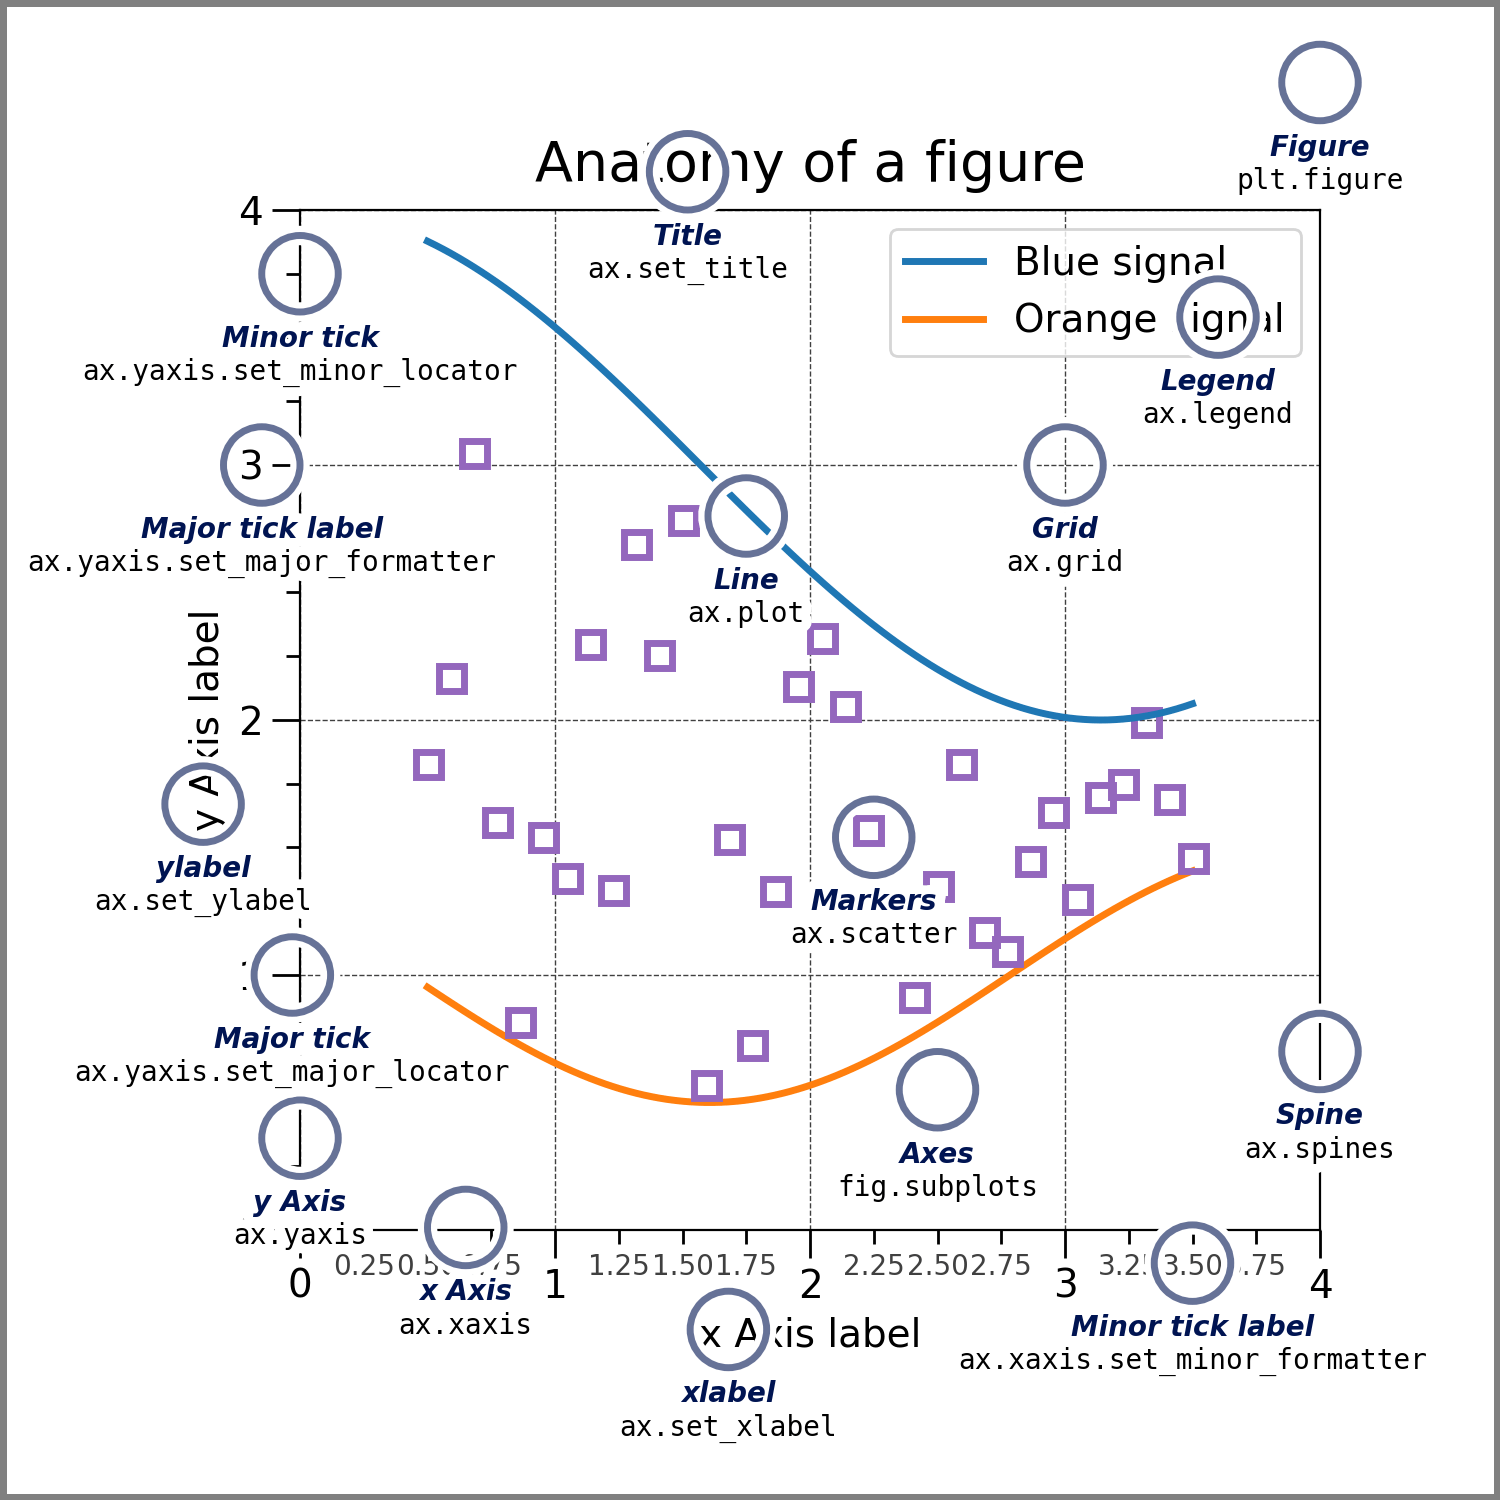

Una vez generada una figura pueden configurarse diferentes elementos. Cuando se usa *plt.* el cambio afecta la figura, mientras que *.ax* modifica sólo un objeto **Axes** específico.



* Etiquetas de ejes.
```
ax.set_xlabel('X label',
              fontdict=18, # Tamaño de la etiqueta
              labelpad=2, # Espacio entre la etiqueta y el eje,
              loc='center' # Alineación de la etiqueta ('left', 'center, 'right')
```


* Titulo.
```
ax.set_title('Title')
```

* Legendas (requiere que cada elemento tenga el parámetro 'label' definid0, por ejemplo ax.plot(x, y, label='line'))
```
ax.legend()
```
Para agregar una leyenda debe especificarse un nombre en el argumento 'label="Nombre"'. El parámetro 'loc' sirve para especificar su posición.

* Grid
```
ax.grid()
```

* Etiquetas de marca de los ejes
```
ax.set_yticks(ticks = np.arange(1, 4.05, 0.2) # Lista o arreglo 1-dimensional de etiquetas.
              labels = labels, # Cambia las etiquetas con un arreglo de nombres 1-dimensionales
              rotation='vertical' # Cambia la rotación de las etiquetas)
```

* Iguala la escala en ambos ejes
```
ax.axis('equal')
ax.set_aspect('equal')
```

* Elimina los ejes
```
ax.set_axis_off()
```

* Eliminar las líneas del marco, conservando los **ticks**. Configurando el eje ('bottom', 'left', 'right', 'top')
```
ax.spines['bottom'].set_visible(False)
```



### Ejemplos

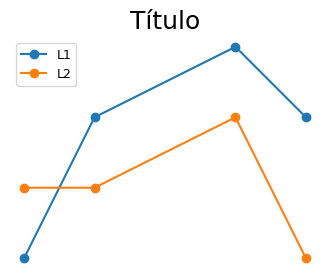

In [19]:
import numpy as np
# Create figure
fig = plt.figure(figsize=(4, 3))
ax = plt.gca()
# Plot data
ax.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o', label="L1")
ax.plot([1, 2, 4, 5], [2, 2, 3, 1], '-o', label="L2")
# Specify axis labels and ticks
ax.set_xlabel("Eje X", fontsize=10)
ax.set_ylabel("Eje Y", fontsize=10)
xticks = np.arange(1, 6, 1)
xticks_labels = ["Ene", "Feb", "Mar", "Abr", "May"]
ax.set_xticks(xticks, xticks_labels, rotation='vertical')
# Add title
ax.set_title("Título", fontsize=18)
# Remove axis
ax.set_axis_off()
# Add grid
ax.grid()
# Equal axis scale
ax.axis('equal')
# Add legend
ax.legend(loc="upper left", fontsize=9)
# Show plot
plt.show()
plt.close()

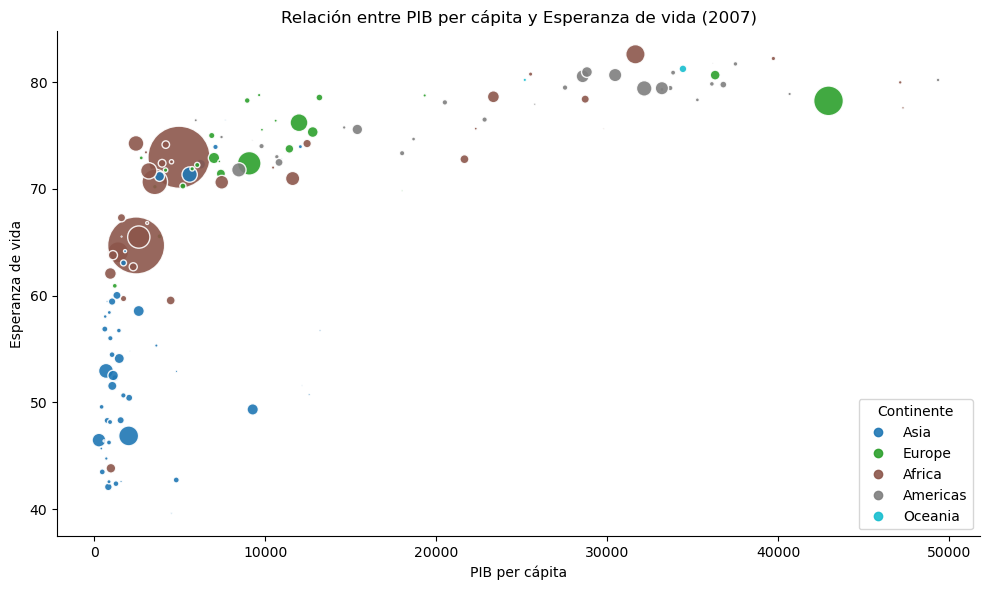

In [20]:
# Import dataset
import pandas as pd
df = pd.read_csv('gapminder.csv')
df_2007 = df[df['year'] == 2007]
max_population = df_2007["pop"].max()
size = 2000 * df_2007["pop"] / df_2007["pop"].max()
color = df_2007['continent'].astype('category').cat.codes.astype(int)
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot data
scatter = ax.scatter(
    df_2007["gdpPercap"], df_2007["lifeExp"],
    s=size,
    c=color,
    alpha=0.9,
    edgecolors='white',
    cmap='tab10'
)
# Set axis labels
xlabel = 'PIB per cápita'
ylabel = 'Esperanza de vida'
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set title
ax.set_title('Relación entre PIB per cápita y Esperanza de vida (2007)')
# Legend by continent
handles, _ = scatter.legend_elements(prop='colors')
labels = df_2007['continent'].unique()
legend = ax.legend(handles, labels, title='Continente')
# Adjust layout
fig.tight_layout()
# Show plot
plt.show()

### **Eje secundario**

Es posible generar un eje secundario usando la función *ax.twinx()* este nuevo eje funcionará como un **Axes** y será posible graficar objetos a través de éste.

In [21]:
x = np.arange(1, 10, .1)
y1 = np.sin(x)
y2 = np.sin(10*x)+100

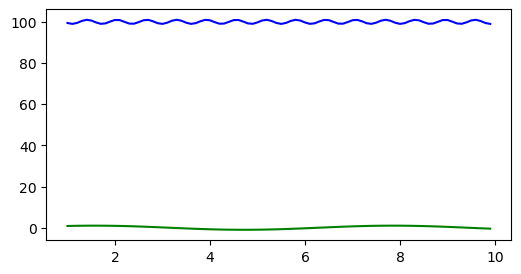

In [22]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y1, color="green")
ax.plot(x, y2, color="blue")

Text(0, 0.5, 'Y-Axis 2')

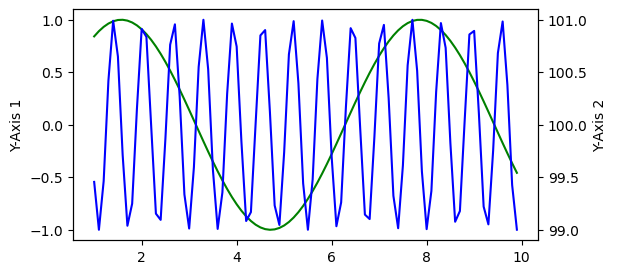

In [23]:
fig, ax1 = plt.subplots(figsize=(6, 3))
ax2 = ax1.twinx()
ax1.plot(x, y1, color="green")
ax1.set_ylabel("Y-Axis 1")
ax2.plot(x, y2, color="blue")
ax2.set_ylabel("Y-Axis 2")

### **Escala de los ejes**

Es posible establecer la escala de los ejes usando la función:


```
ax.set_xscale('log')
ax.set_yscale('linear')
```

Estableciendo el tipo de escala requerida:
* 'linear'
*  'log' (logarítmica)
* Otras opciones: 'asinh', 'logit', 'symlg'



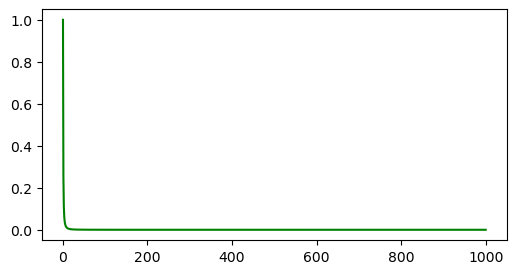

In [24]:
x = np.arange(1, 1000, 1)
y = 1 / (x**2)
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y, color="green")
plt.show()
plt.close()

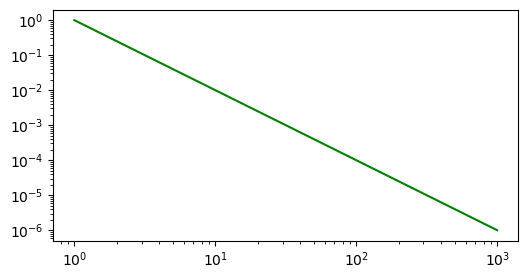

In [25]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y, color="green")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()
plt.close()

## **Agregar textos**


Existen dos formas para agregar textos a una gráfica

* *text*: Agregar texto en un punto específico de un **Axes**. Permite crear objetos que envuelven el texto.
* *annotate*: Agregar una anotación, con flechas opcionales en un **Axes**
* *figtext*: Agregar un texto en un punto específico de la **Figure**

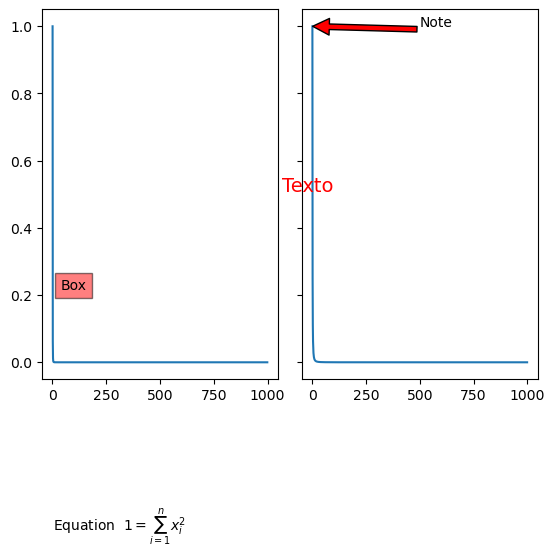

In [26]:
fig = plt.figure()
grid = fig.add_gridspec(1,2, wspace=0.1)
axes = grid.subplots(sharex=True, sharey=True)
axes[0].plot(x, y**2)
axes[1].plot(x, y)
for ax in axes.flat:
  ax.label_outer()
# Text in boxed
axes[0].text(100,.25, 'Box',
             ha='center', va='top',
             bbox={'facecolor': 'red',
                   'alpha': 0.5})
# Text in math form
axes[0].text(2, -.5, r'Equation  $1=\sum_{i=1}^n x_i^2$')
# Annotate with arrows
axes[1].annotate('Note',
                 xy=(2.1, 1), xytext=(500, 1),
                 arrowprops={'facecolor': 'red'})
plt.figtext(.5,.5, "Texto", fontsize=14, color='red')
plt.show()

En las anotaciones se puede controlar la posición del texto con el parámetro *xytext* y la posición donde apunta la flecha con el parámetro *xy*, ambos en formato tupla.

Las características de la flecha se pueden modificar proporcionando un diccionario en el parámetro *arrowprops*. El tipo de flecha se controla con el parámetro *arrowstyle*, entre las opciones está: '->', '<->', '-|>', 'simple', 'fancy', etc.

En el caso del objeto *text* se puede controlar las coordenadas de posición se colocan al inicio, seguido del texto. Se puede especificar la posición del texto respecto a esas coordenadas con los parámetros *ha* y *va*, así como la rotación. Además, se puede crear una caja proporcionando un diccionario con sus características al parámetro *bbox*. Además del rectángulo se pueden usar otros estilos de caja con el parámetro *boxtyle*: 'circle', 'square', 'elipse', 'round', etc.

# **Otras herramientas**

## **Formas geométricas**

En Matplotlib, existe una clase denominada *patches* que son elementos gráficos que permite agregar formas geométricas a los ejes. Deben importarse del modulo 'matplotlib.patches', después crearse como objeto especificando sus características, y finalmente usar 'ax.add_patch()' para agregarlo a la visualización.

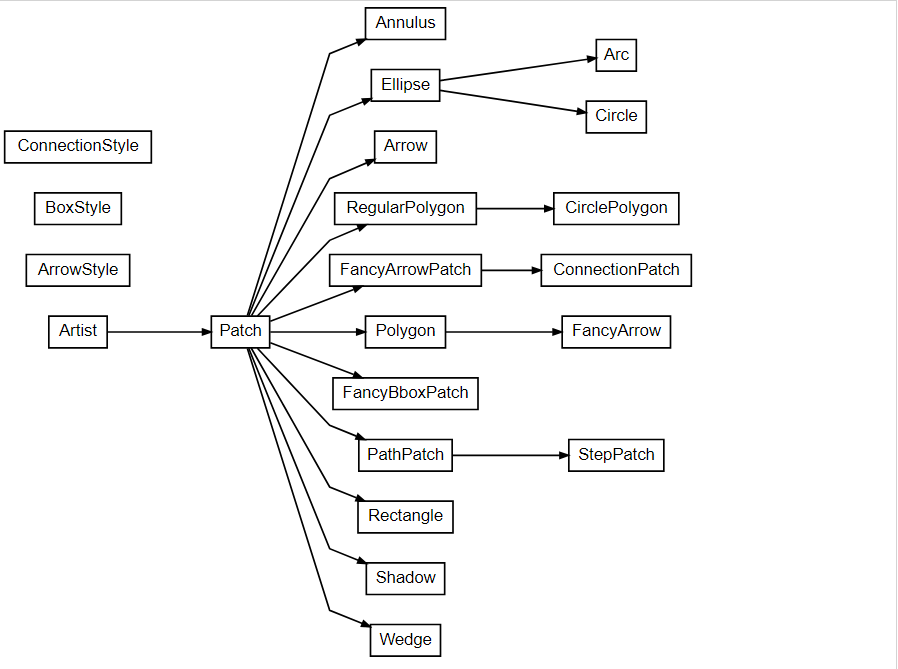

Los *patches* pueden ayudarnos a resaltar elementos dentro de la gráfica. Por ejemplo:

In [33]:
from matplotlib.patches import Rectangle

(-1.0, 1.0)

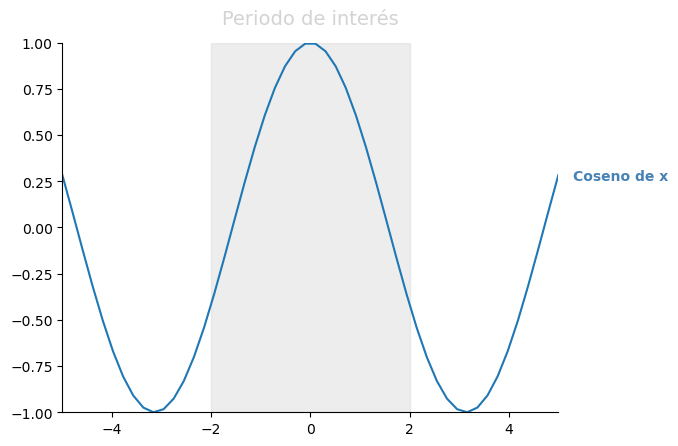

In [34]:
fig, ax = plt.subplots()
x = np.linspace(-5, 5, num=50)
y = np.cos(x)
ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rect = Rectangle((-2,-1), 4, 2, color='lightgray', alpha=0.4)
ax.add_patch(rect)

ax.text(0, 1.1, 'Periodo de interés', color='lightgray', ha='center', fontsize=14)
ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

## **Relleno de figuras**

Matplotlib permite rellenar el espacio entre dos funciones o valores del eje y usando el comando
```
ax.fill_between()
```

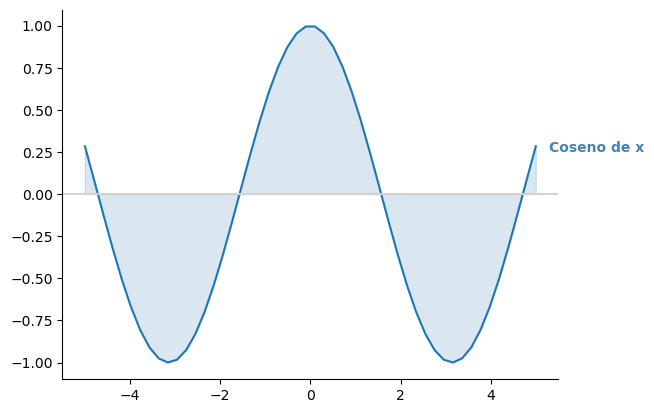

In [36]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")
ax.axhline(0, color='lightgray')
ax.fill_between(x, y, y2=0, color='steelblue', alpha=0.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

plt.show()

## **Líneas verticales y horizontales**

Para crear lineas verticales y horizontales de manera directa (sin definir los puntos y usar ax.plot()) se utiliza las funciones

```
ax.axhline() # (horizontal)
ax.axvline() # (vertial)
```


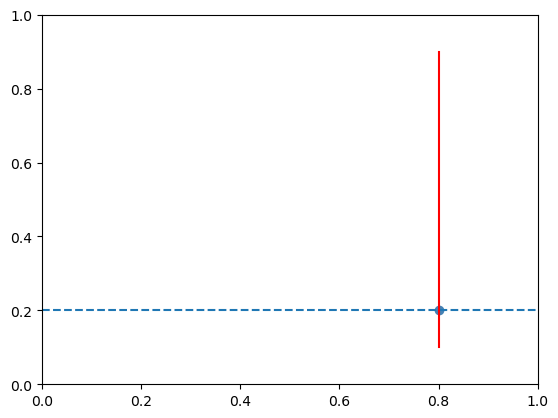

In [38]:
fig, ax = plt.subplots()

ax.axhline(0.2, linestyle='--')
ax.axvline(0.8, 0.1, 0.9, color="red")

ax.scatter([0.8], [0.2], color='steelblue')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.show()

## **Enlaces**

En los siguientes enlaces encontrarás elementos para personalizar tus gráficas:

* [Marcadores de puntos](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#unfilled-markers)
* [Estilos de líneas](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)
* [Nombres de colores](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)
* [Paletas de colores](https://matplotlib.org/stable/users/explain/colors/colormaps.html#sphx-glr-users-explain-colors-colormaps-py)